### Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

In [16]:
import pandas as pd

# Load the dataset
file_path = 'Hotel Reservations.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [17]:
df = hotel_data

In [18]:
df.shape

(36275, 19)

In [19]:
# Basic information about the dataset
info = df.info()
# Basic statistical summary
summary = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [20]:
# Checking for missing values
missing_values = df.isnull().sum()

(info, summary, missing_values)

(None,
        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
 count  36275.000000    36275.000000          36275.000000       36275.000000   
 mean       1.844962        0.105279              0.810724           2.204300   
 std        0.518715        0.402648              0.870644           1.410905   
 min        0.000000        0.000000              0.000000           0.000000   
 25%        2.000000        0.000000              0.000000           1.000000   
 50%        2.000000        0.000000              1.000000           2.000000   
 75%        2.000000        0.000000              2.000000           3.000000   
 max        4.000000       10.000000              7.000000          17.000000   
 
        required_car_parking_space     lead_time  arrival_year  arrival_month  \
 count                36275.000000  36275.000000  36275.000000   36275.000000   
 mean                     0.030986     85.232557   2017.820427       7.423653   
 std               

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Setting the aesthetic style of the plots
plt.style.use('seaborn')  ## Using the seaborn as a plot style

C:\Users\simha\AppData\Local\Temp\ipykernel_34908\2303176440.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  ## Using the seaborn as a plot style


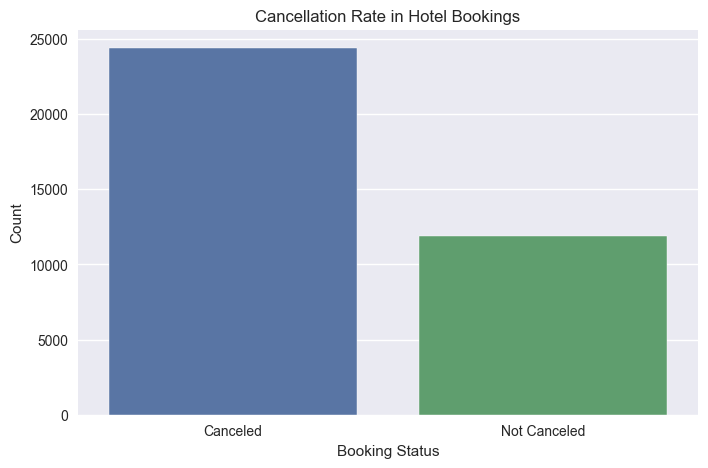

In [22]:
# Plotting the cancellation rate
plt.figure(figsize=(8, 5))
sns.countplot(x='booking_status', data=df)
plt.title('Cancellation Rate in Hotel Bookings')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Canceled', 'Not Canceled'])
plt.show()

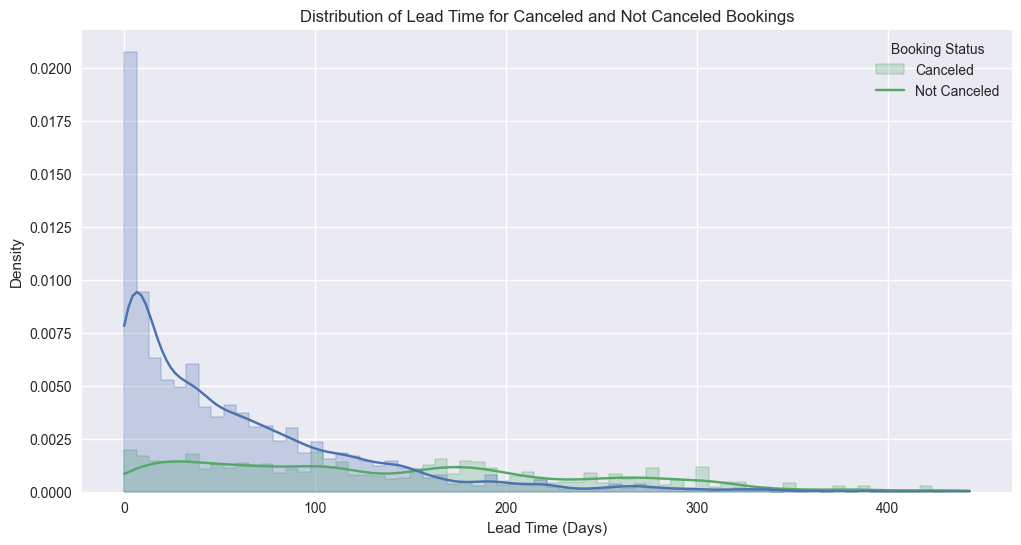

In [23]:
# Plotting the distribution of lead times for canceled and not canceled bookings
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lead_time', hue='booking_status', kde=True, element='step', stat='density')
plt.title('Distribution of Lead Time for Canceled and Not Canceled Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Density')
plt.legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])
plt.show()

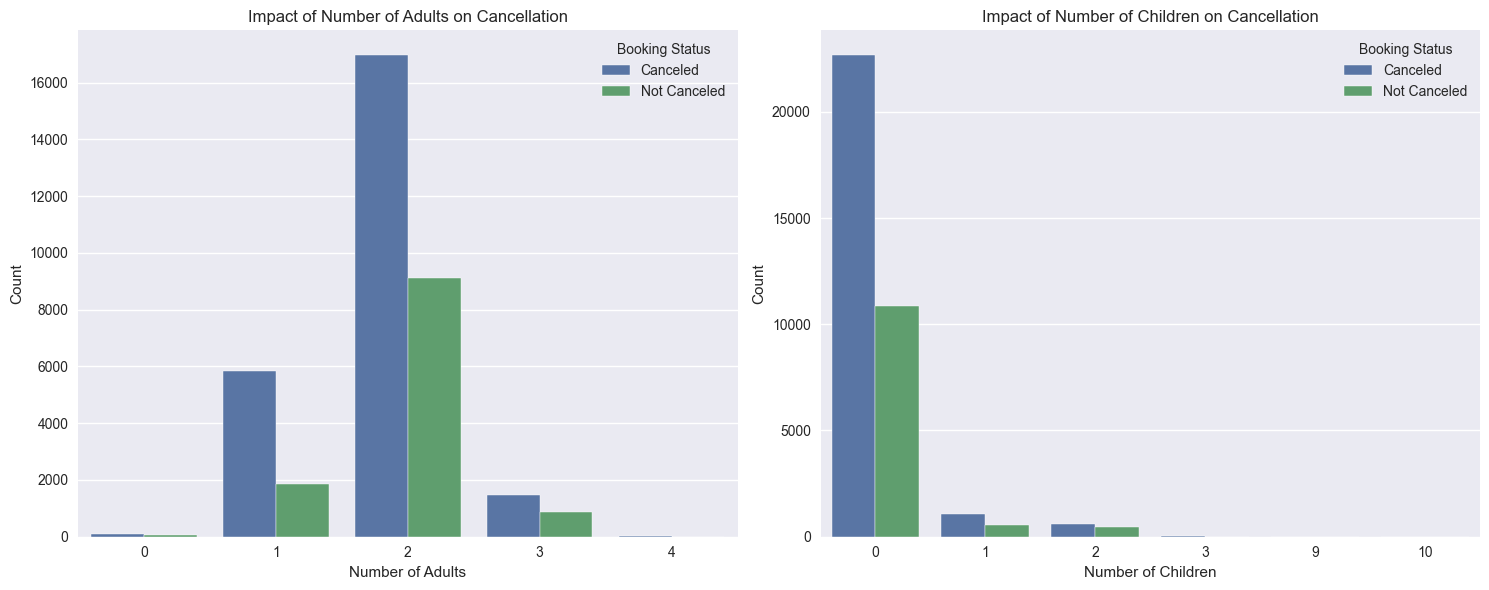

In [25]:
# Plotting the impact of number of adults and children on cancellation rates
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Number of adults
sns.countplot(x='no_of_adults', hue='booking_status', data=hotel_data, ax=ax[0])
ax[0].set_title('Impact of Number of Adults on Cancellation')
ax[0].set_xlabel('Number of Adults')
ax[0].set_ylabel('Count')
ax[0].legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])

# Number of children
sns.countplot(x='no_of_children', hue='booking_status', data=hotel_data, ax=ax[1])
ax[1].set_title('Impact of Number of Children on Cancellation')
ax[1].set_xlabel('Number of Children')
ax[1].set_ylabel('Count')
ax[1].legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])

plt.tight_layout()
plt.show()

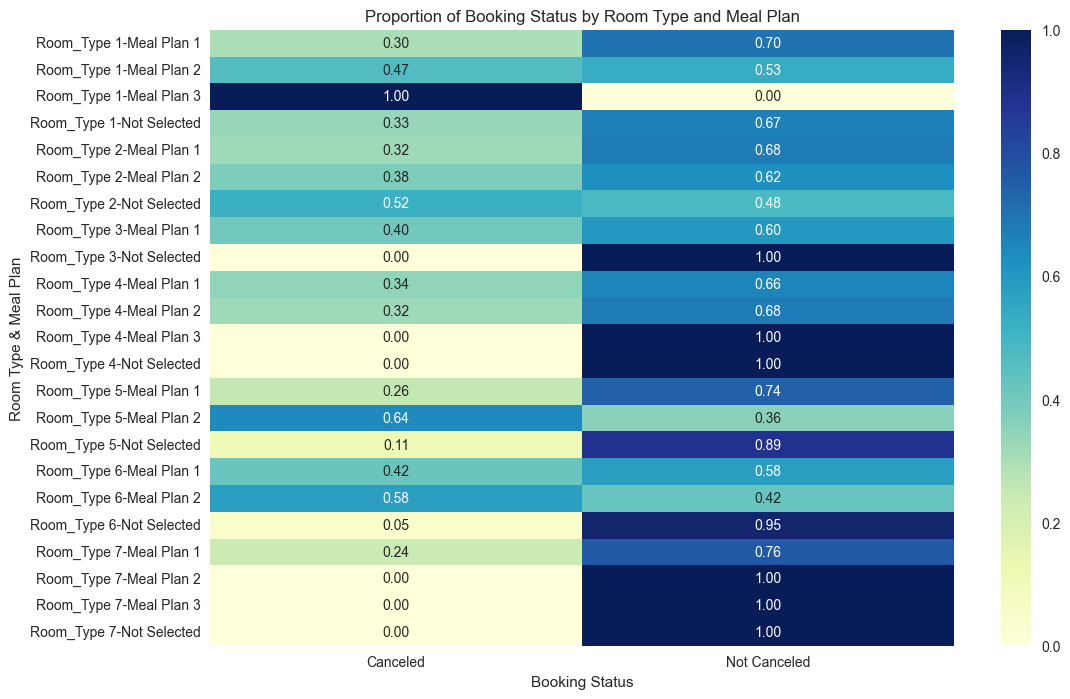

In [26]:
# Creating a new dataframe for heatmap analysis
heatmap_data = hotel_data.groupby(['room_type_reserved', 'type_of_meal_plan']).booking_status.value_counts().unstack().fillna(0)

# Normalizing the counts to show proportions
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Proportion of Booking Status by Room Type and Meal Plan')
plt.xlabel('Booking Status')
plt.ylabel('Room Type & Meal Plan')
plt.xticks([0.5, 1.5], ['Canceled', 'Not Canceled'])
plt.show()

<Figure size 1200x600 with 0 Axes>

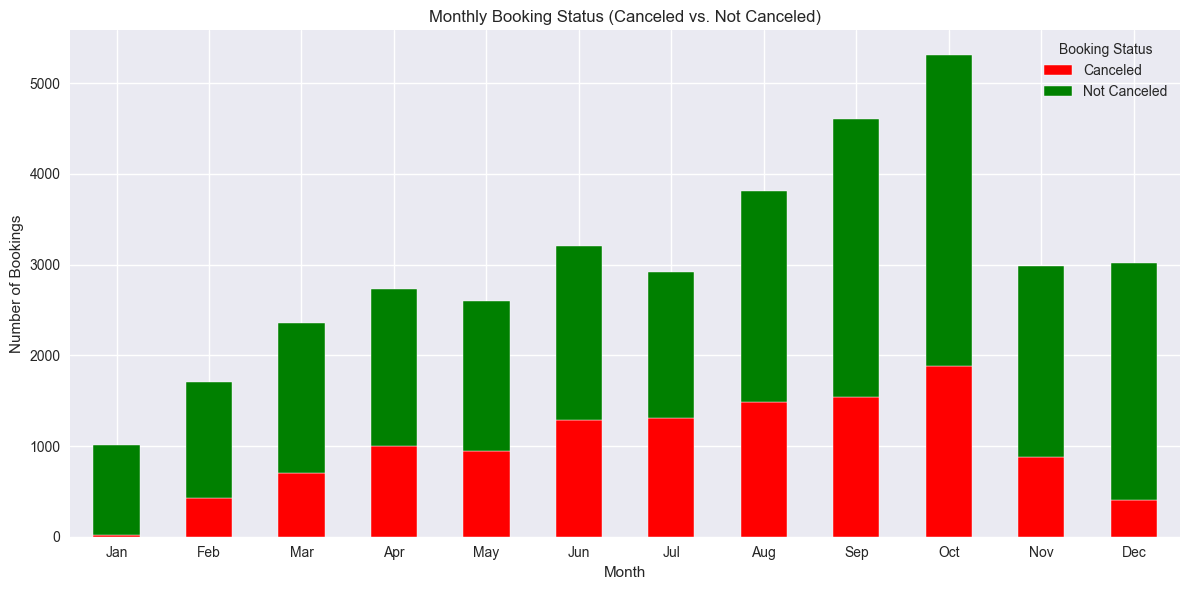

In [29]:
# Creating a monthly booking status count
monthly_booking_status = hotel_data.groupby(['arrival_month', 'booking_status']).size().unstack()

# Plotting the monthly trends
plt.figure(figsize=(12, 6))
monthly_booking_status.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))
plt.title('Monthly Booking Status (Canceled vs. Not Canceled)')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])
plt.tight_layout()
plt.show()
